In [1]:
import numpy as np
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from custom_callbacks import SegmentationModelCallback
from segmentation_model import BSS
from generators import IsGenerator
from tensorflow import reduce_mean

In [2]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [3]:
segment_model = BSS(input_sh=(128, 128, 3))
segment_model.compile(optimizer=Adam(), loss=[BinaryCrossentropy(), MeanSquaredError()])


In [4]:
images_path = "C:\\Users\\1\\Desktop\\drone_solution_meta\\archive (25)\\IMG-20240123T113057Z-001\\IMG"
segmentation_path = "C:\\Users\\1\\Desktop\\drone_solution_meta\\archive (25)\\MASK-20240123T113059Z-001\\MASK"
generator = IsGenerator(images_path=images_path, segmentation_path=segmentation_path, input_sz=(128, 128))

In [5]:
images = []
segims = []
for sample_n, (image, segim) in enumerate(iter(generator)):

    if sample_n == 1000:
        break

    images.append(image)
    segims.append(segim)

images = np.asarray(images)
segims = np.asarray(segims)

images = images / 255.0
segims = segims / 255.0
    

In [6]:
segims = reduce_mean(segims, axis=-1)
segims = segims.numpy()

In [7]:
images.shape

(1000, 128, 128, 3)

In [8]:
def show_samples(data, samples_n=25):

    samples_r = int(np.sqrt(samples_n))
    fig, axis = plt.subplots(nrows=samples_r, ncols=samples_r)

    sample_n = 0
    for i in range(samples_r):
        for j in range(samples_r):
            
            axis[i, j].imshow(data[sample_n], cmap="jet")
            sample_n += 1
    
    plt.show()
    

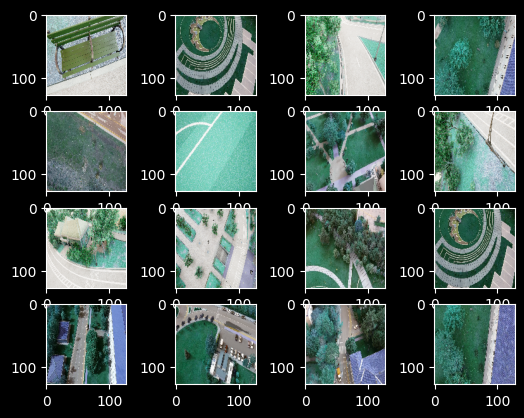

In [9]:
show_samples(images, samples_n=16)

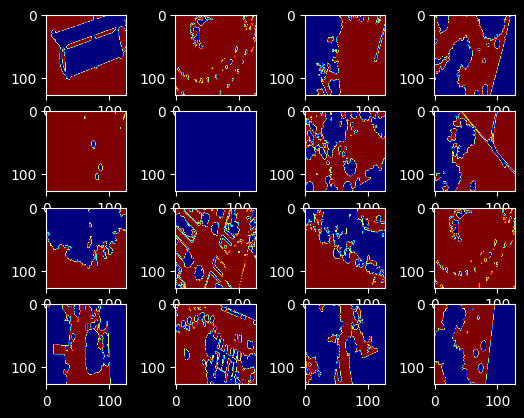

In [10]:
show_samples(segims, samples_n=16)

In [11]:
print(segims.shape)

(1000, 128, 128)


In [12]:
random_idx = np.random.randint(0, images.shape[0], 100)
images = images[random_idx]
segims = segims[random_idx]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - segmentation_loss: 7.846


c:\Users\1\Desktop\drone_solution\tests\custom_callbacks.py:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axis = plt.subplots(nrows=samples_r, ncols=samples_r)


4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - segmentation_loss: 7.7493
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/stepsegmentation_loss: 6.86
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - segmentation_loss: 7.0273
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/stepsegmentation_loss: 6.90
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - segmentation_loss: 6.9522
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/stepsegmentation_loss: 7.44
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - segmentation_loss: 7.3218
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 856ms/stepsegmentation_loss: 6.96
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - segmentation_loss: 6.8331
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/stepsegmentation_loss: 6.73
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - segmentation_loss: 6.7399
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/stepsegmentation_loss: 6.41
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - segmentation_loss: 6.3618
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/stepsegmentation_loss: 6.87
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/st

FileNotFoundError: [Errno 2] Unable to synchronously create file (unable to open file: name = 'c\Users\1\Desktop\drone_solution_meta\models_weights\segmentation_model.weights.weights.h5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 302)

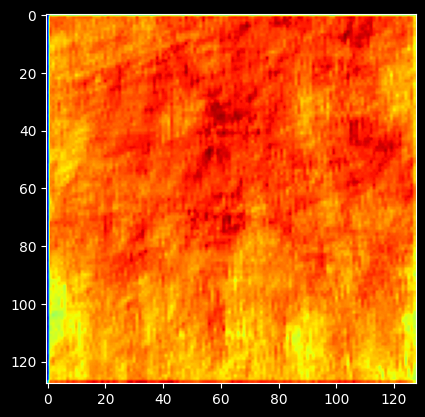

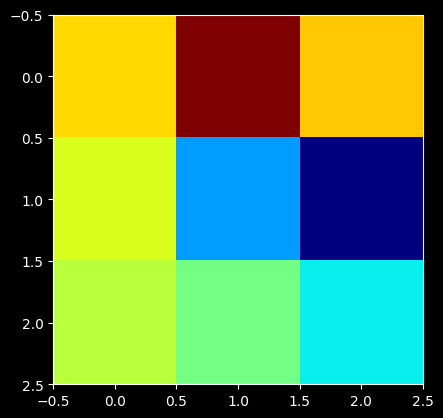

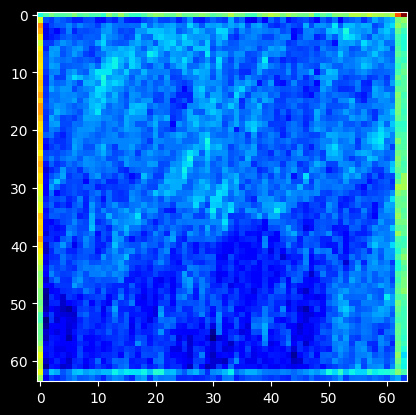

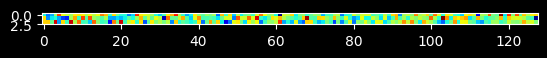

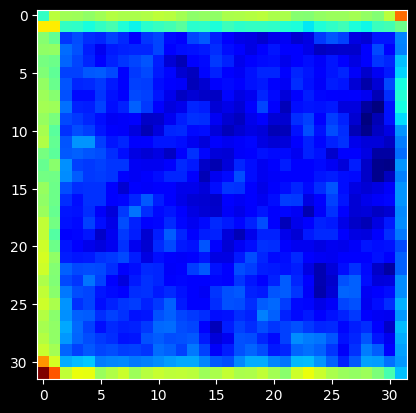

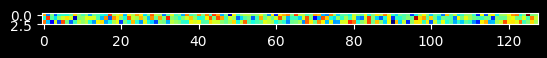

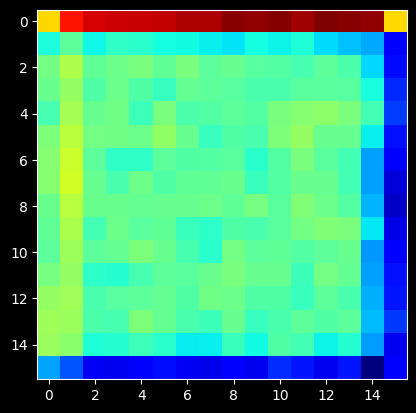

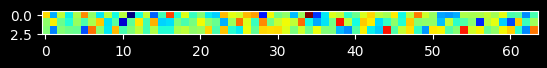

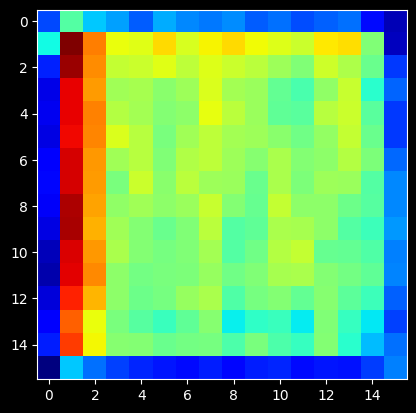

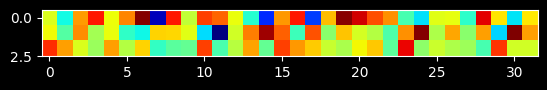

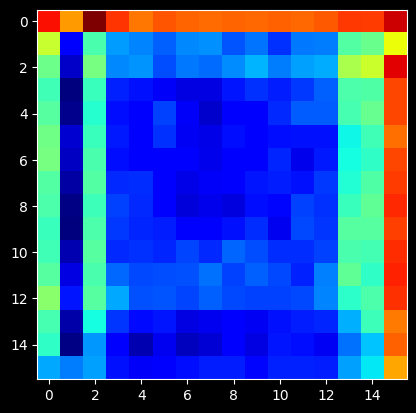

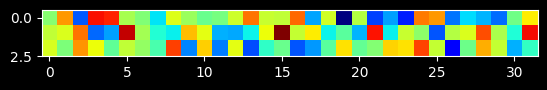

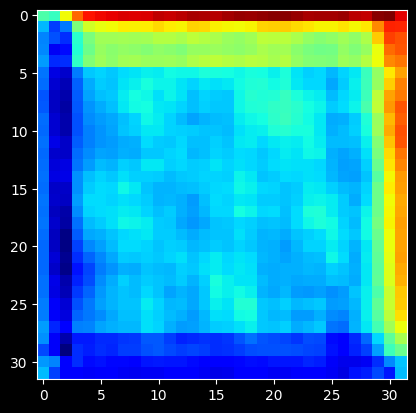

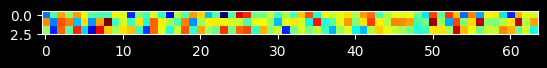

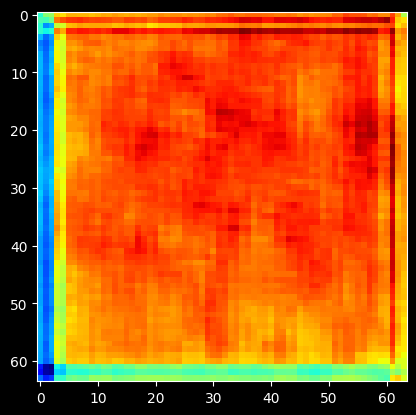

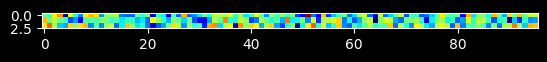

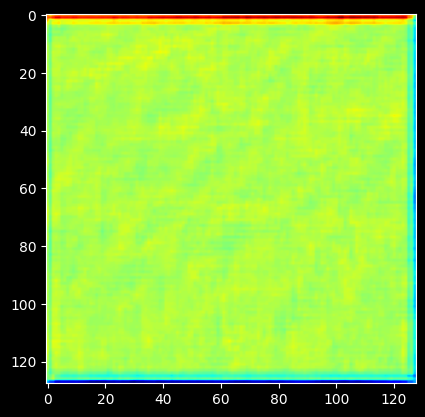

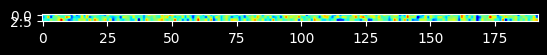

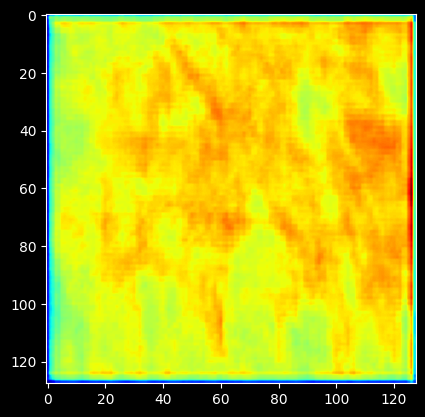

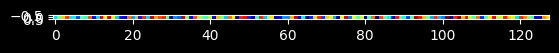

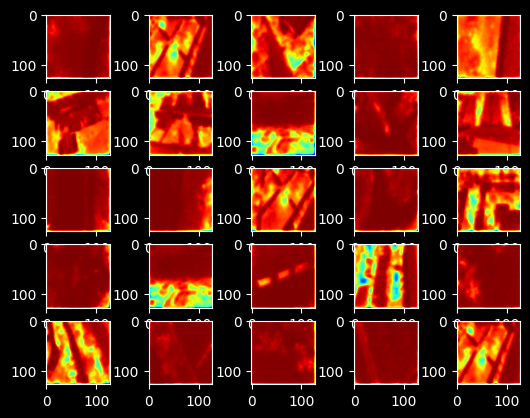

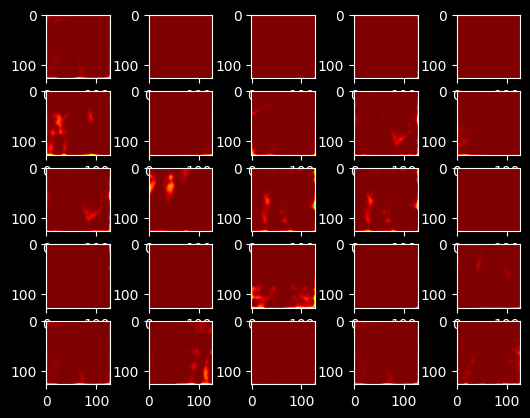

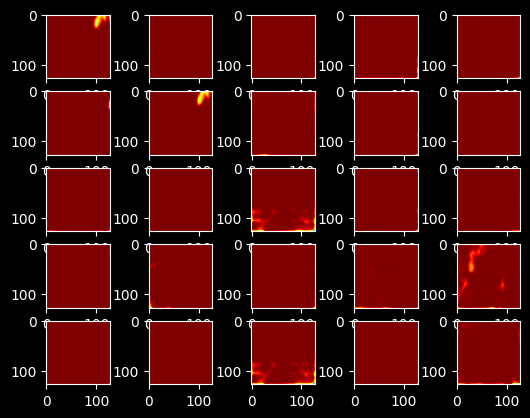

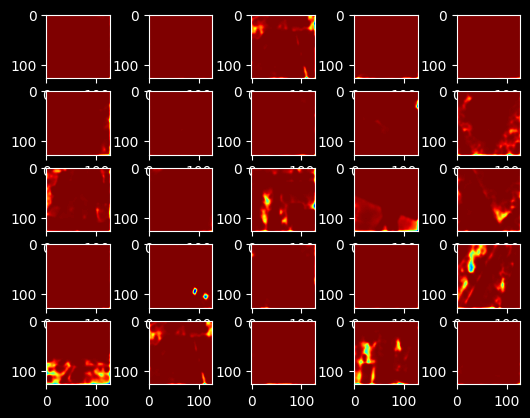

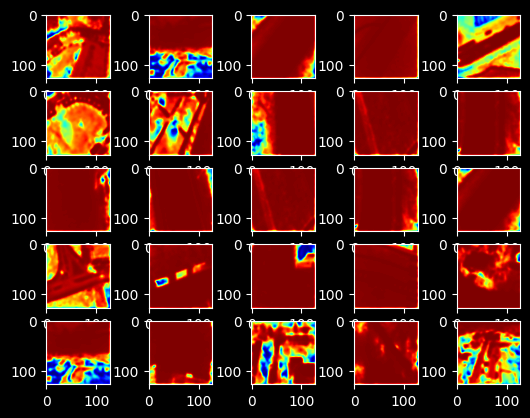

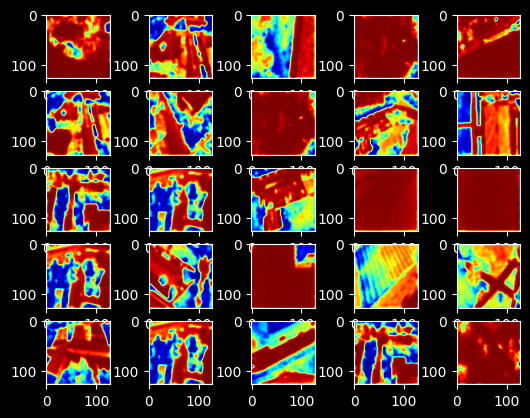

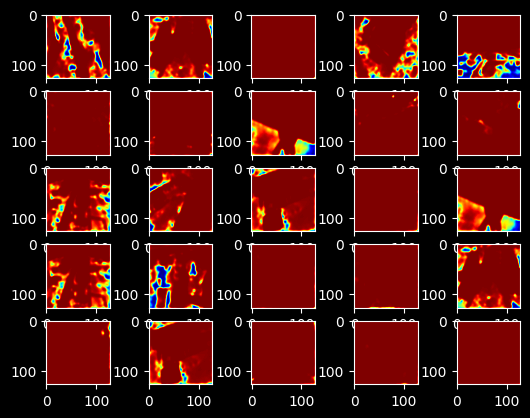

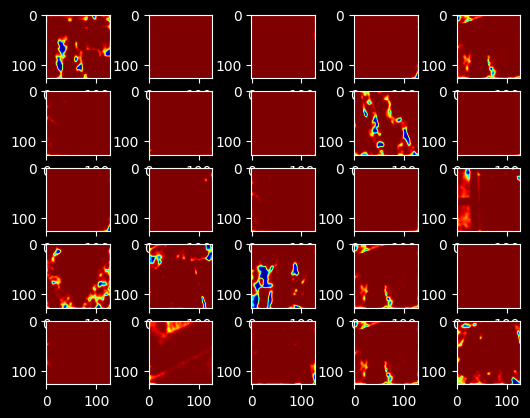

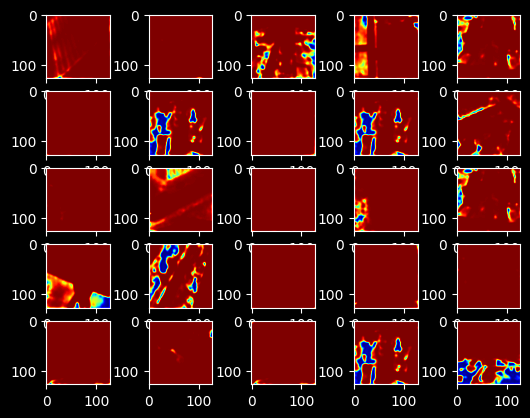

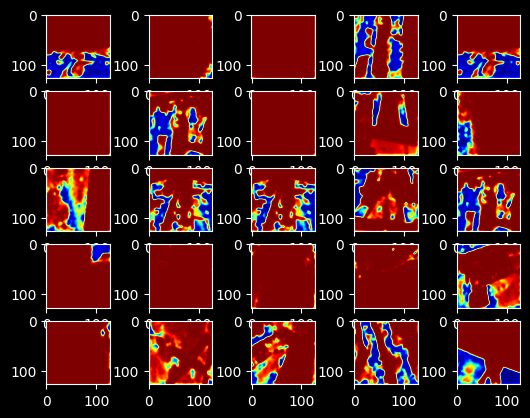

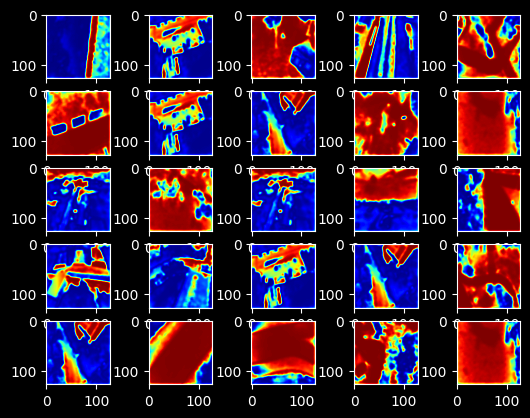

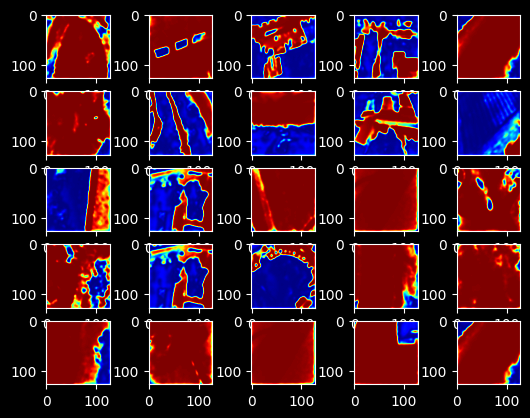

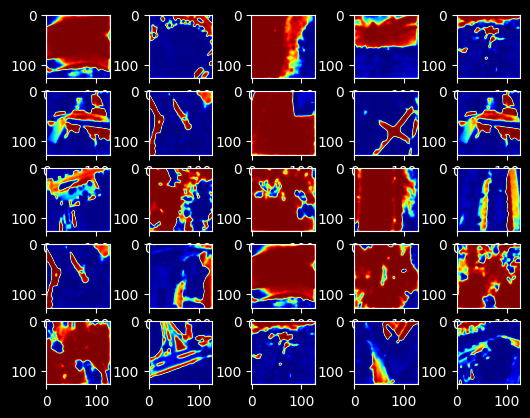

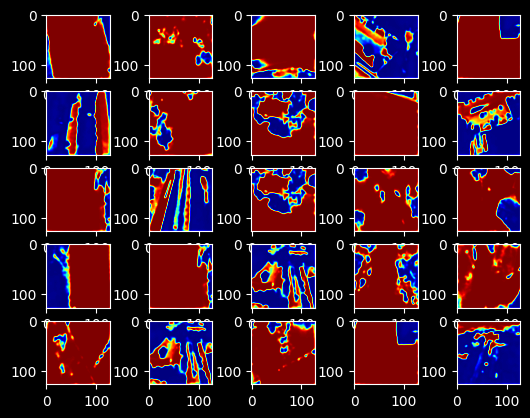

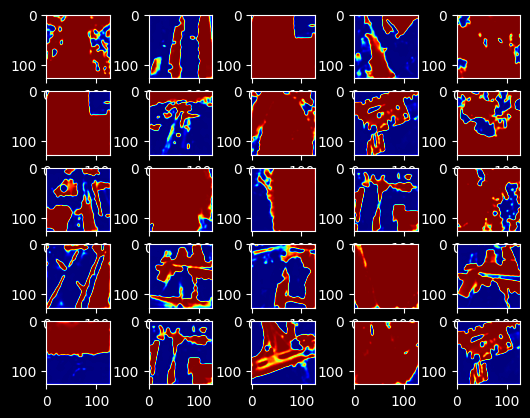

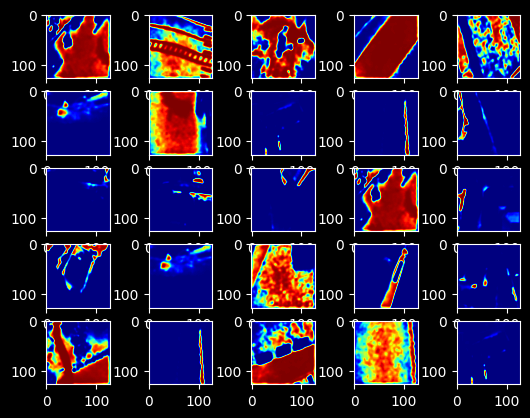

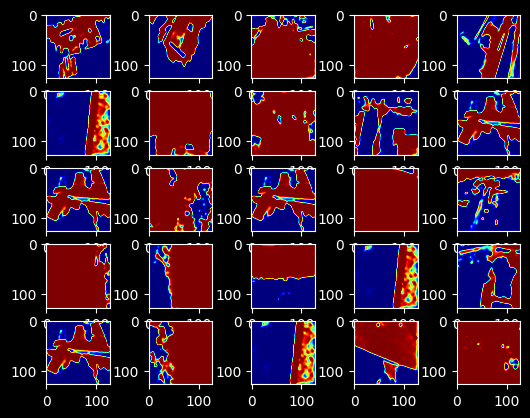

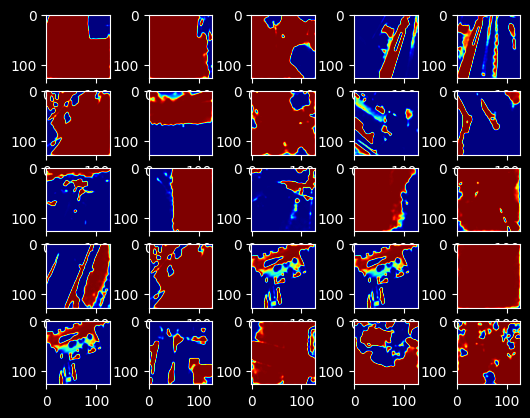

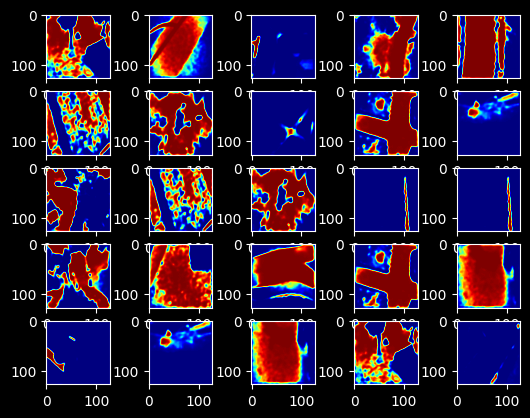

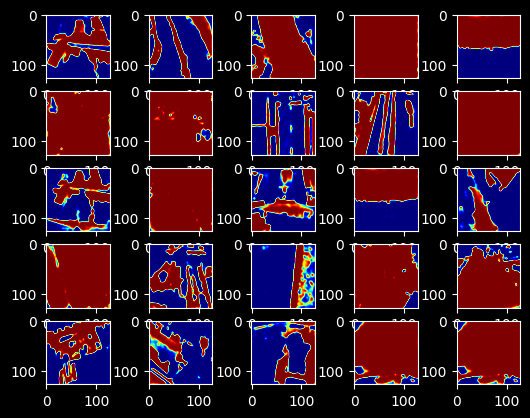

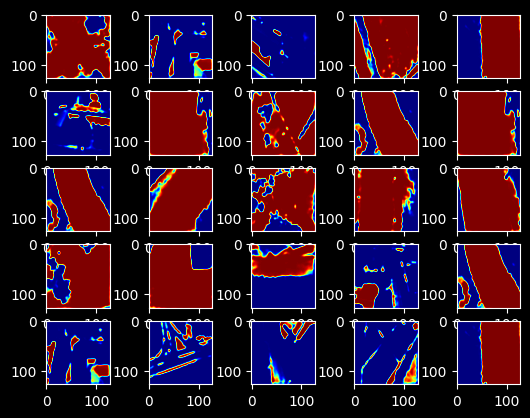

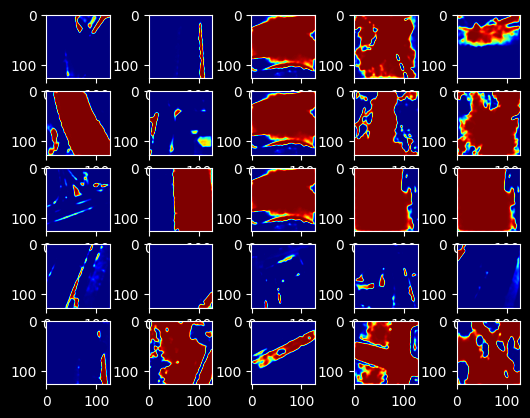

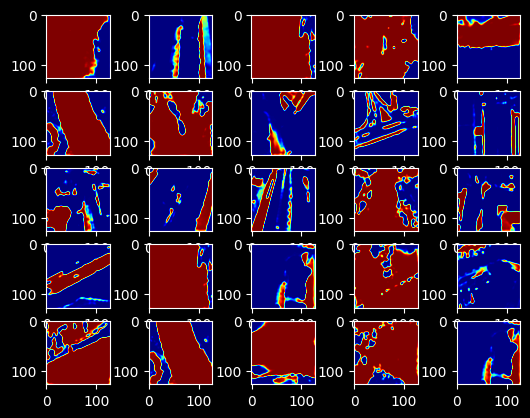

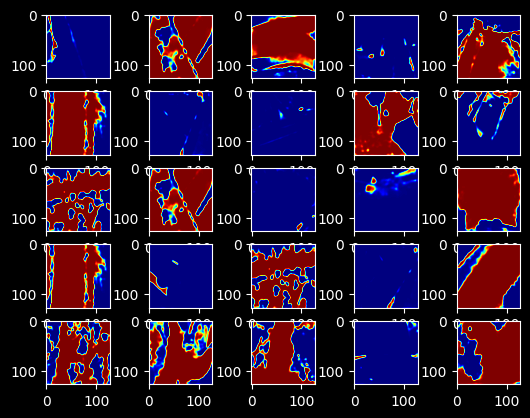

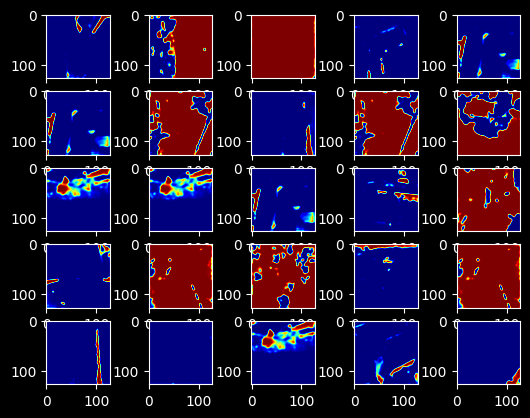

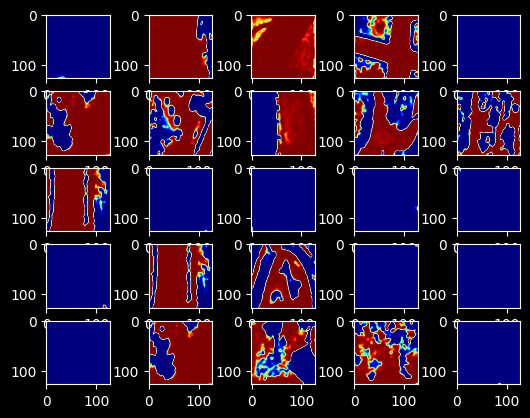

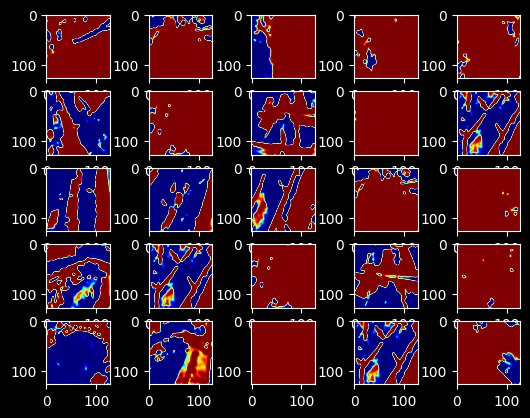

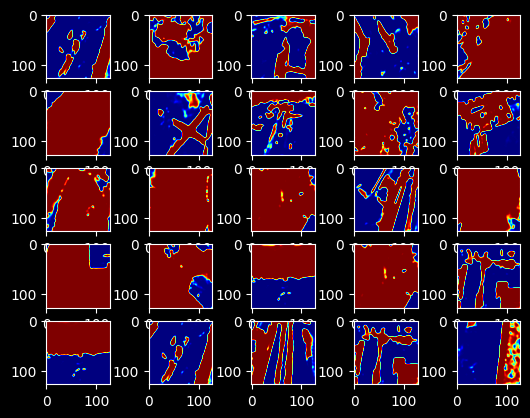

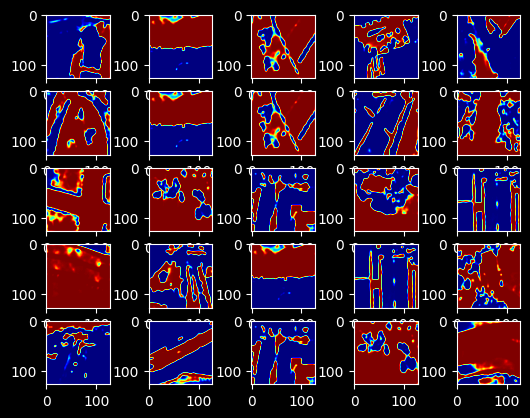

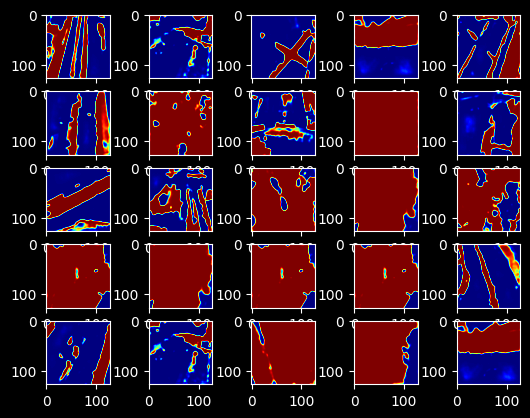

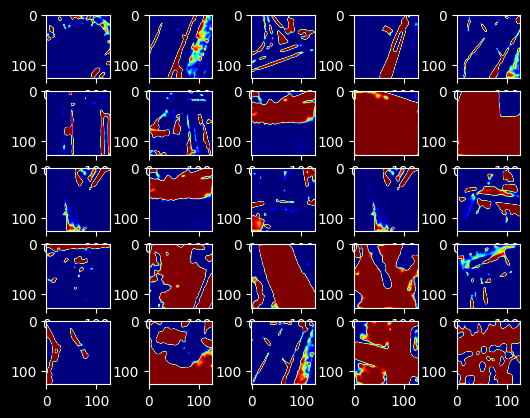

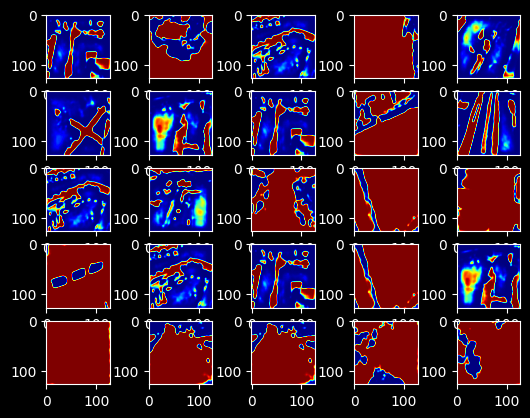

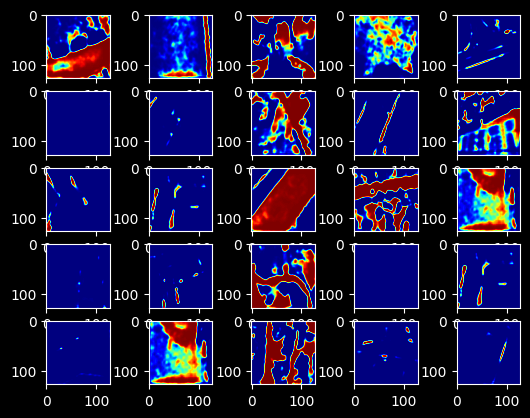

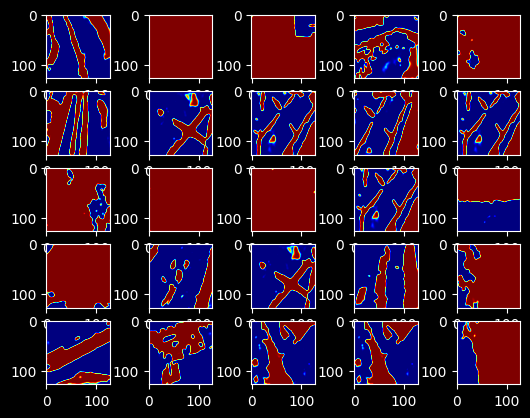

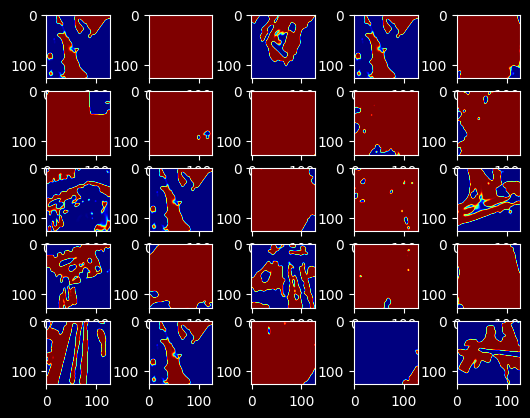

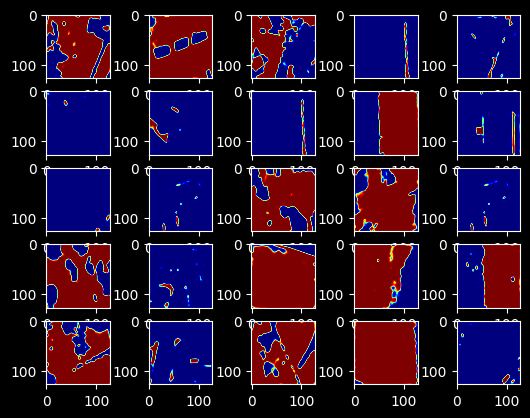

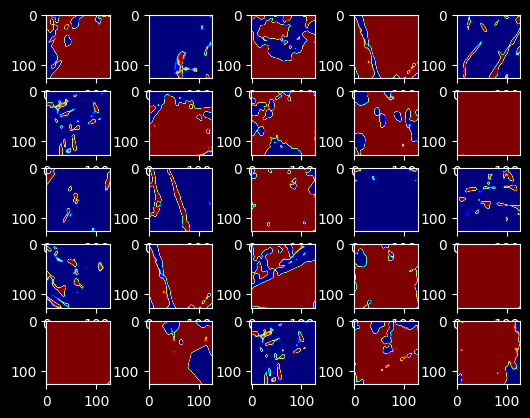

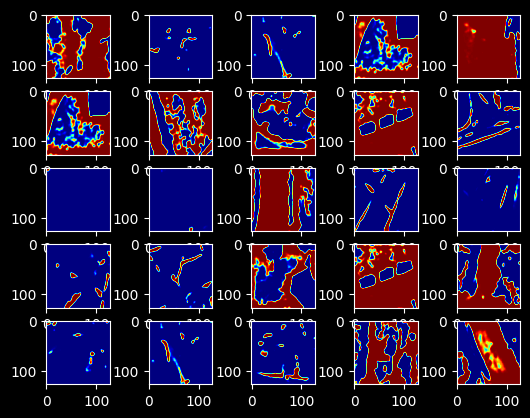

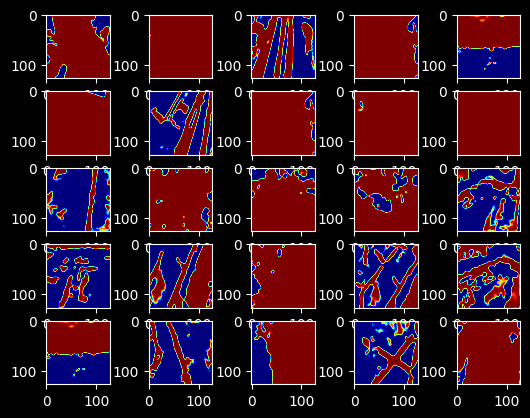

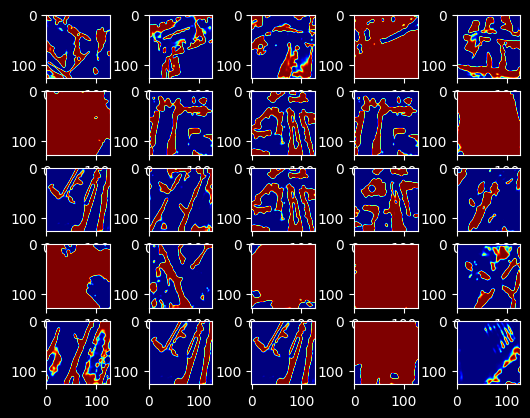

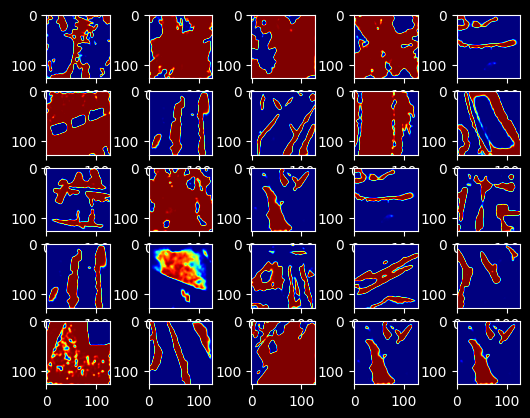

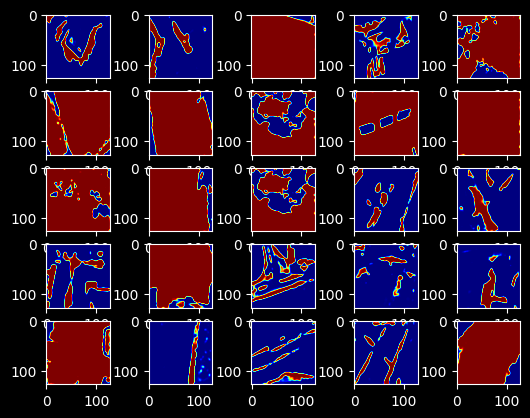

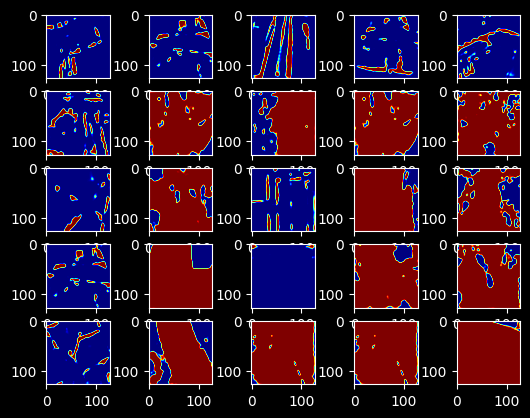

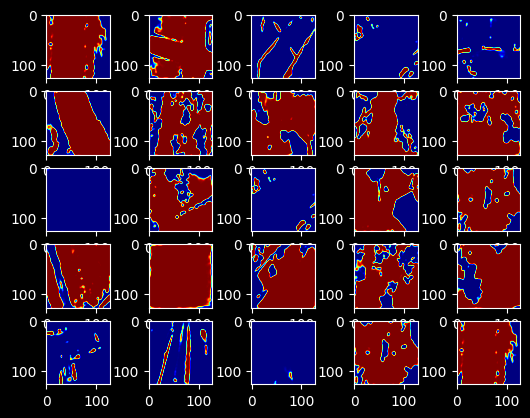

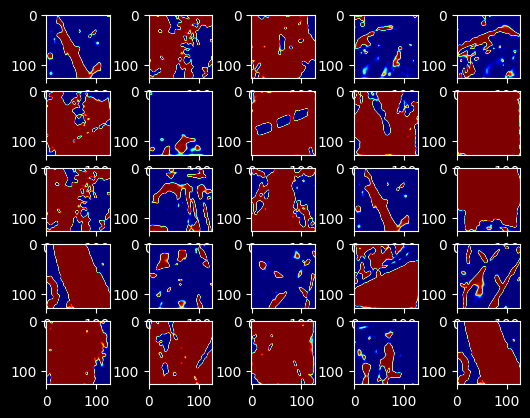

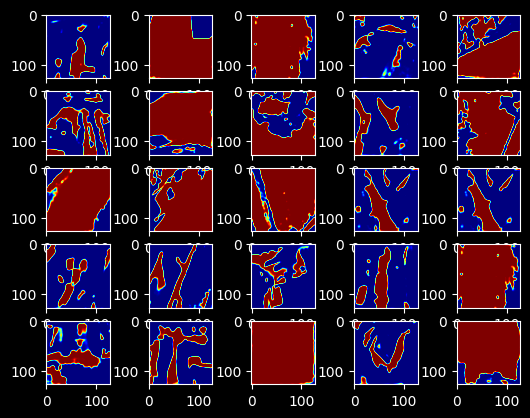

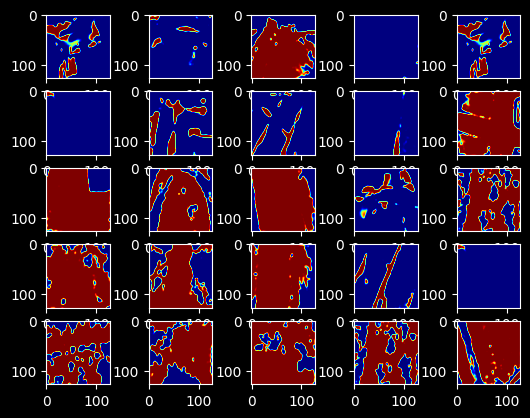

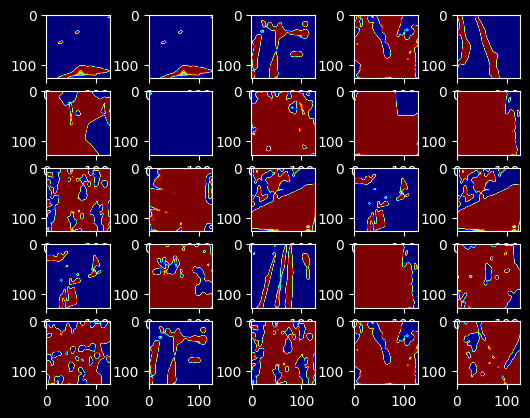

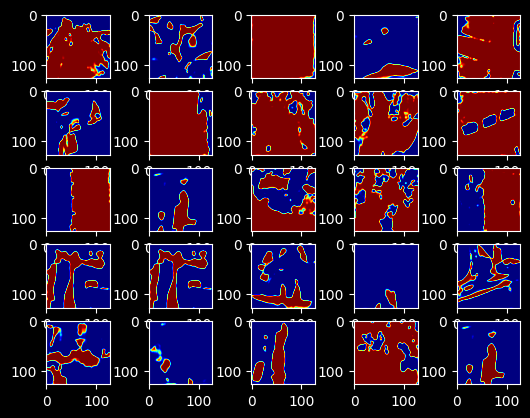

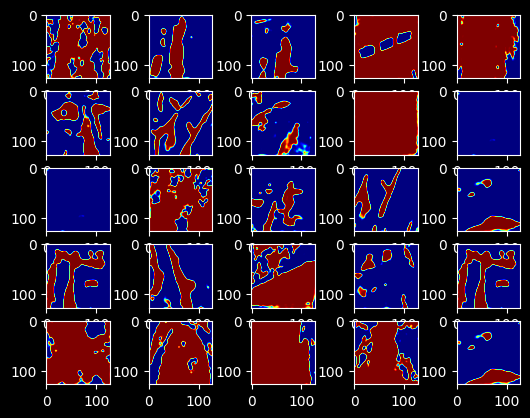

In [13]:
seg_callback = SegmentationModelCallback(model=segment_model.model, run_folder="C:\\Users\\1\\Desktop\\drone_solution_meta\\segmentation_model_logs", train_data=images, samples_n=25)
segment_model.fit(images, segims, epochs=50 , batch_size=32, callbacks=[seg_callback])
segment_model.save_weights(filepath="c\\Users\\1\\Desktop\\drone_solution_meta\\models_weights\\segmentation_model.weights.weights.h5")


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


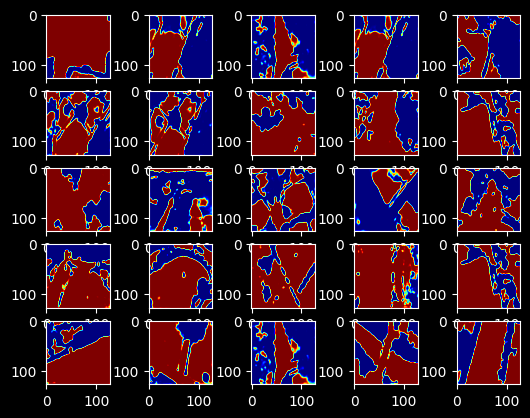

In [14]:
segmented_images = segment_model.predict(images[:100])
show_samples(segmented_images, samples_n=25)

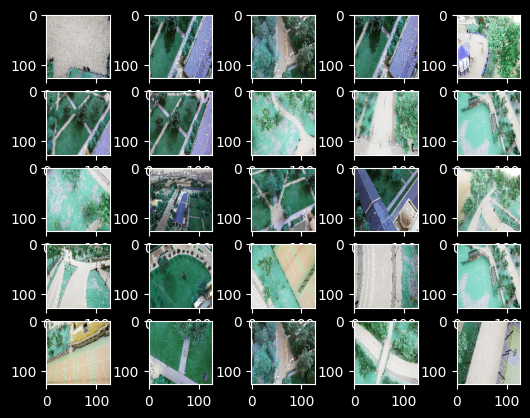

In [15]:
show_samples(images[:100], samples_n=25)

In [16]:
segment_model.model.summary()
conv_layers = [layer for layer in segment_model.model.layers if "conv" in layer.name]
print(len(conv_layers))

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      3,584 │ input_layer[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d   │ (None, 64, 64,    │          0 │ activation[0][0]  │
│ (AveragePooling2D)  │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ average_pooling2… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │    147,584 │ activation_1[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ conv2d_1[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │      8,320 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 64, 64,    │          0 │ dense_1[0][0],    │
│                     │ 128)              │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ multiply[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d_1 │ (None, 32, 32,    │          0 │ activation_2[0][… │
│ (AveragePooling2D)  │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ average_pooling2… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 608,641 (2.32 MB)

 Trainable params: 605,825 (2.31 MB)

 Non-trainable params: 2,816 (11.00 KB)

10


In [17]:
import cv2

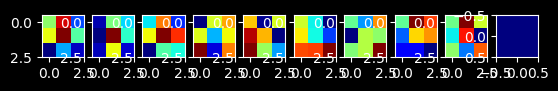

In [18]:
fig, axis = plt.subplots(ncols=10)
for layer_n, layer in enumerate(conv_layers):

    weights = layer.get_weights()[0]
    weights = reduce_mean(weights, axis=-1)
    weights = reduce_mean(weights, axis=-1)

    
    axis[layer_n].imshow(weights, cmap="jet")

plt.show()

    